# Keras Regression Model 

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Now, set the display parameters
pd.set_option('display.max.column', None)

In [4]:
%%HTML
<style type=""text/CSS"">
table.dataframe td, table.dataframe th{
    border: 2px red solid !important;
    color: lightgray !important;
    } 
</style>

In [5]:
# Print data
df = pd.read_csv('C:/Users/peace/dash/data/world_city_population.csv')
df.head()

,pop2023,pop2022,city,country,growthRate,type,rank
0,37194105,37274002,Tokyo,Japan,-0.0021,w,1
1,32941309,32065760,Delhi,India,0.0273,w,2
2,29210808,28516903,Shanghai,China,0.0243,w,3
3,23209616,22478117,Dhaka,Bangladesh,0.0325,w,4
4,22619736,22429799,Sao Paulo,Brazil,0.0085,w,5


In [6]:
df.drop('rank', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pop2023     778 non-null    int64  
 1   pop2022     778 non-null    int64  
 2   city        778 non-null    object 
 3   country     778 non-null    object 
 4   growthRate  778 non-null    float64
 5   type        778 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 36.6+ KB


In [8]:
#F1 = df[['pop2022', 'pop2023']]
#F1.describe()

In [9]:
df.describe()

,pop2023,pop2022,growthRate
count,7.780000e+02,7.780000e+02,778.000000
mean,2.658927e+06,2.607826e+06,0.020758
std,3.700349e+06,3.638665e+06,0.013135
min,7.500970e+05,7.231140e+05,-0.034800
25%,9.921812e+05,9.657890e+05,0.012625
50%,1.381252e+06,1.362342e+06,0.019950
75%,2.607130e+06,2.548158e+06,0.028675
max,3.719410e+07,3.727400e+07,0.061100


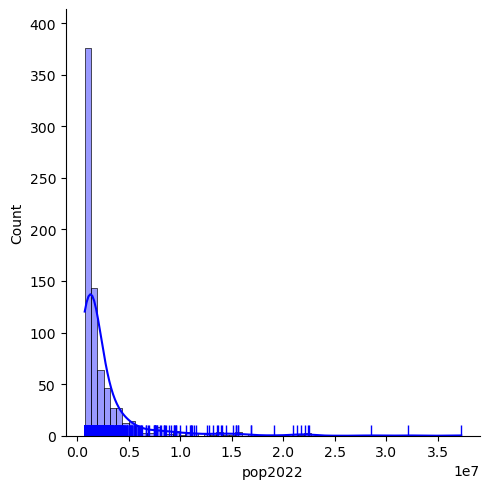

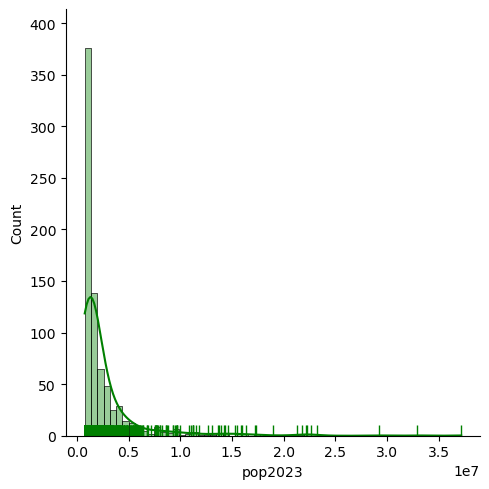

In [10]:
#plt.figure(figsize=(9, 5))
sns.displot(df, x="pop2022", color='b', bins=60, alpha=0.4, rug=True, kde=True)
sns.displot(df, x="pop2023", color='g', bins=60, alpha=0.4, rug=True, kde=True)

In [11]:
df_T = df.select_dtypes(include = ['float64', 'int64'])
df_T.head()

,pop2023,pop2022,growthRate
0,37194105,37274002,-0.0021
1,32941309,32065760,0.0273
2,29210808,28516903,0.0243
3,23209616,22478117,0.0325
4,22619736,22429799,0.0085


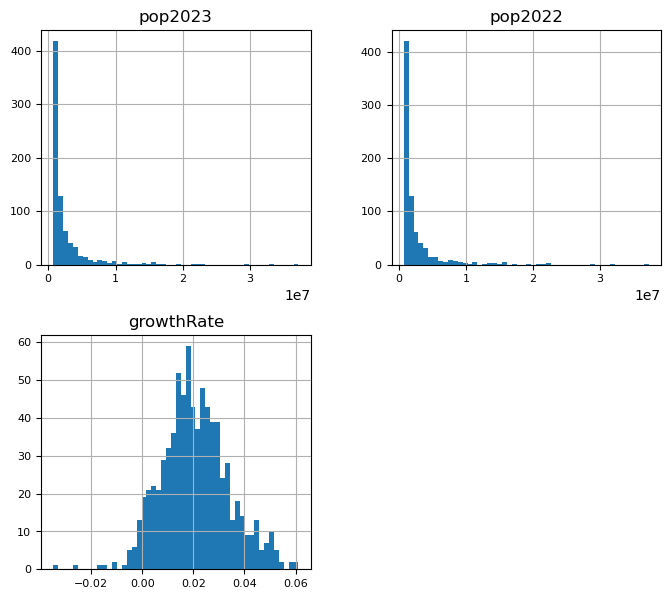

In [12]:
df_T.hist(figsize=(8, 7), bins=50, xlabelsize=8, ylabelsize=8);

In [13]:
# Convert all the categorical values (non numerical) columns into numeric by encoding the categories.
var_mod =['city', 'country', 'type']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

pop2023         int64
pop2022         int64
city            int32
country         int32
growthRate    float64
type            int32
dtype: object

In [15]:
# prepare and split the data
X = df.drop('pop2023', axis=1)
y = df['pop2023']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [16]:
print("Test_sise {}. Training_size {}.".format(len(y_test),len(y_train)))

Test_sise 156. Training_size 622.


In [17]:
# data Standardization
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [18]:
# Create and train a Keras regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(130, activation='relu'),
    tf.keras.layers.Dense(67, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error')

# For a better work space epoch is adjusted to 100. It can be increased to equal the numbers of rows. However, 
# the tweaking optimise the model performance.
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Adjust the architecture of the neural network, hyperparameters, 
# and preprocessing steps to optimize the model's performance.

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 20465907138560.0000 - val_loss: 21904836526080.0000
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 20465896652800.0000 - val_loss: 21904823943168.0000
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 20465886167040.0000 - val_loss: 21904800874496.0000
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 20465861001216.0000 - val_loss: 21904767320064.0000
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 20465816961024.0000 - val_loss: 21904712794112.0000
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 20465754046464.0000 - val_loss: 21904624713728.0000
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 20465657577472.0000 - val_loss: 21904509370368.0000
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 20465538039808.0000 - val_loss: 21904345792512.0000

In [34]:
# Prediction based on the test data
m_predict = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, m_predict)
print("Mean Squared Error:", mse)

5/5 [==============================] - 0s 2ms/step
Mean Squared Error: 19598262708645.023


In [36]:
# Print
output = pd.DataFrame({'pop2024': m_predict.squeeze()})
output.head(2)

,pop2024
0,94542.671875
1,71373.789062


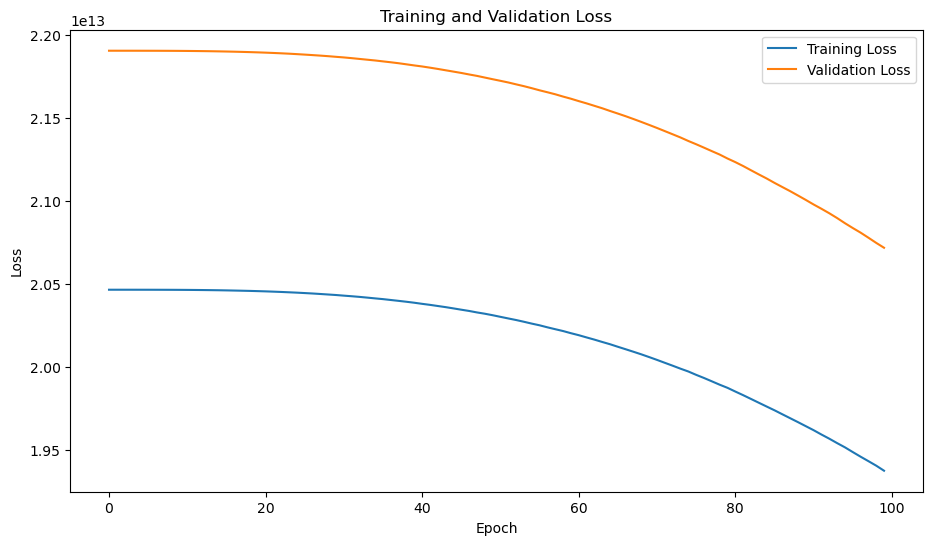

In [22]:
# Visualize training history
plt.figure(figsize=(11, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### We normalize the data and establish a Keras regression model incorporating numerous hidden layers. 
#### The model is configured by compiling it with an optimizer and loss function, after which we proceed to 
#### train it using the provided training dataset. To gauge the model's effectiveness, we assess its performance
#### using the mean squared error metric and graphically depict the progression of its training over time.